In [4]:
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import preprocessing
from keras.models import Model, Sequential
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
import pandas as pd
import glob
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

In [6]:
def data_train():
        path_train=glob.glob('100_A_P/Train_100/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path'])
        patient_id=[]
        sublabel=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
        data['path']=path_train
        data['sublabel']=sublabel
        return data

data_train=data_train()
print('Number of images in the training set is {}'.format(len(data_train)))

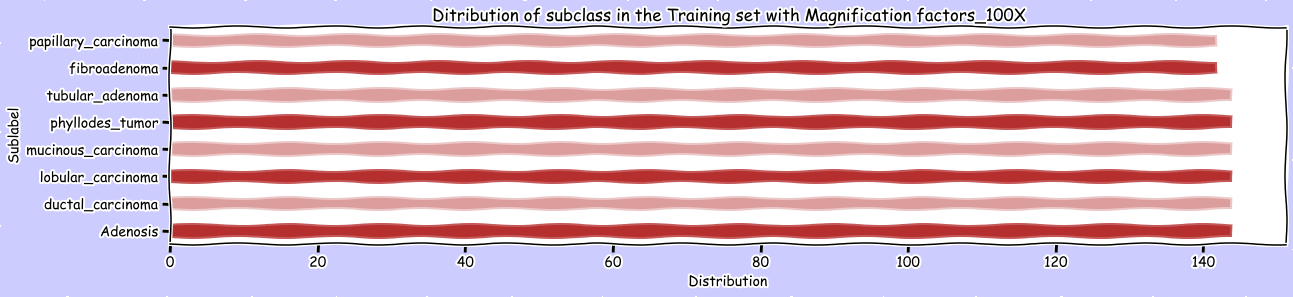

In [3]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    data_train.sublabel.value_counts().plot(kind='barh',color=['#b22222c0','#b2222240'],label='female')
    plt.title('Ditribution of subclass in the Training set with Magnification factors_100X')
    plt.xlabel('Distribution')
    plt.ylabel('Sublabel')
    
    plt.show()

In [4]:
def data_test():
        path_valid = glob.glob('100_A_P/Test_100/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path'])
        patient_id = []
        sublabel = []
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
        data['path'] = path_valid
        data['sublabel'] = sublabel
        return data
data_test=data_test()
print('Number of images in the testing set is {}'.format(len(data_test)))

Number of images in the testing set is 320


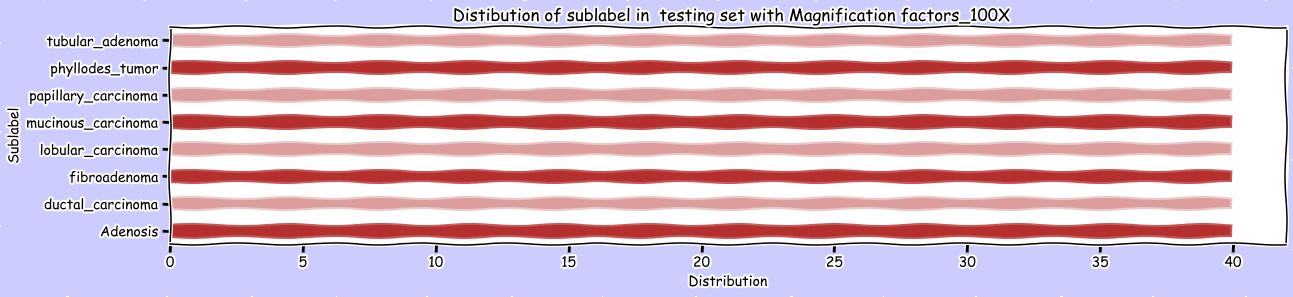

In [5]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    data_test.sublabel.value_counts().plot(kind='barh',color=['#b22222c0','#b2222240'],label='female')
    plt.title(' Distibution of sublabel in  testing set with Magnification factors_100X')
    plt.xlabel('Distribution')
    plt.ylabel('Sublabel')
    
    plt.show()

In [12]:
def data_train():
    train_images=[]
    train_labels=[]
    SIZE=224
    i=0
    for directory_path in glob.glob("100_A_P/Train_100/*"):
        label = directory_path.split('\\')[-1]
        for img_path  in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path)       
                img = cv2.resize(img, (SIZE, SIZE))
                print(img_path)
                train_images.append(img)
                train_labels.append(label)
            except:
                break
    return train_images,train_labels
        
train_images,train_labels=data_train()

100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010D.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010E.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010F.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010G.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010H.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010J.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010K.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010L.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010M.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010_C.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0010_I.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0021D.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-0021E.p

100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110F.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110G.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110H.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110J.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110K.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110L.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110M.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110_C.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01110_I.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01211D.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01211E.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB-100-01211F.png
100_A_P/Train_100\Adenosis\_Sub_Adenosis_ID_SOB_B_A-14-22549AB

100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-002.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-003.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-004.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-005.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-006.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-007.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-008.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-009.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-010.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-011.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-3909-100-001.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-3909-100-002.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-3909-100-003.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-3909-100-004.png
100_A_P/Train_100\ductal_carcinoma\SOB_M_DC-14-3909-100-005.png
100_A_P/Train_100\ductal_carcinoma\SOB_M

100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0021G.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0021H.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0021J.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0021K.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0021L.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0021_C.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0021_I.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0032D.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0032E.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0032F.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0032G.png
100_A_P/Train_100\fibroadenoma\_Sub_fibroadenoma_ID_SOB_B_F-14-14134-100-0032H.png
10

100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0377D.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0377E.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0377F.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0377G.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0377H.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0377_C.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0388D.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0388E.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0388F.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-0388G.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_

100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05221H.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05221_C.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05322D.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05322E.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05322F.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05322G.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05322H.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05322_C.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05423D.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular-carcinoma_ID_SOB_M_LC-14-12204-100-05423E.png
100_A_P/Train_100\lobular_carcinoma\_Sub_lobular

100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00112E.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00112F.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00112G.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00112H.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00112_C.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00213D.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00213E.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00213F.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00213G.png
100_A_P/Train_100\mucinous_carcinoma\_Sub_mucinous-carcinoma_ID_SOB_M_MC-14-12773-100-00213H.png
100_A_P/Train_100\mucinous_ca

100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0043G.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0043H.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0043_C.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0054D.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0054E.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0054F.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0054G.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0054H.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0054_C.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-12465-100-0065D.png
100_A_P/Train_100\

100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00867G.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00867H.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00867_C.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00968D.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00968E.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00968F.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00968G.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00968H.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-00968_C.png
100_A_P/Train_100\papillary_carcinoma\_Sub_papillary-carcinoma_ID_SOB_M_PC-14-9146-100-01069D.png
100_A_P/Train_100\

100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0010_C.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0010_I.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0021D.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0021E.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0021F.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0021G.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0021H.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0021J.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0021_C.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998AB-100-0021_I.png
100_A_P/Train_100\phyllodes_tumor\_Sub_phyllodes-tumor_ID_SOB_B_PT-14-21998A

100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-006.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-007.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-008.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-009.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-010.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-011.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-012.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-013.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-014.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-015.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-016.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-017.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-018.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-019.png
100_A_P/Train_100\tubular_adenoma\SOB_B_TA-14-16184-100-020.png
100_A_P/Train_100\tubular_adenoma\SOB_B_

100_A_P/Train_100\tubular_adenoma\_Sub_tubular-adenoma_ID_SOB_B_TA-14-13200-100-0109_I.png
100_A_P/Train_100\tubular_adenoma\_Sub_tubular-adenoma_ID_SOB_B_TA-14-13200-100-01110_C.png
100_A_P/Train_100\tubular_adenoma\_Sub_tubular-adenoma_ID_SOB_B_TA-14-13200-100-01110_I.png


In [13]:
def data_test():
    test_images=[]
    test_labels=[]
    SIZE=224
    for directory_path in glob.glob("100_A_P/Test_100/*"):
        label = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path) 
                img = cv2.resize(img, (SIZE, SIZE))
                test_images.append(img)
                test_labels.append(label)
            except:
                break
    return test_images,test_labels
        
test_images,test_labels=data_test()
print(len(test_labels))

320


In [14]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)





In [15]:

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)





In [16]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train=train_images
y_train=train_labels_encoded
x_test=test_images
y_test = test_labels_encoded



In [17]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [18]:
SIZE=224
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features

In [ ]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
X_for_test = X_test_features

In [ ]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_test_features , y_test)]

model_xgboost.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

In [ ]:
import sklearn.metrics as metrics
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model_xgboost.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

#Print overall accuracy
#from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

In [ ]:
y_train_pred = model_xgboost.predict_proba(X_for_training)
y_valid_pred = model_xgboost.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

In [ ]:
learning_rate_list = [0.05, 0.1,0.01]
max_depth_list = [3, 5,30]
n_estimators_list = [2000, 3000,5000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

In [390]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y_train, model.predict_proba(X_for_training),multi_class="ovr")

model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=4,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X_for_training, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[CV 1/4] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.984, test=0.984) total time= 4.6min
[CV 2/4] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.989, test=0.989) total time= 4.6min
[CV 3/4] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.989, test=0.989) total time= 4.7min
[CV 4/4] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.987, test=0.987) total time= 4.8min
[CV 1/4] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.984, test=0.984) total time= 6.6min
[CV 2/4] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.989, test=0.989) total time= 6.0min
[CV 3/4] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.989, test=0.989) total time= 6.3min
[CV 4/4] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.987, test=0.987) total time= 6.4min
[C

[CV 3/4] END learning_rate=0.1, max_depth=30, n_estimators=5000;, score=(train=0.989, test=0.989) total time= 8.2min
[CV 4/4] END learning_rate=0.1, max_depth=30, n_estimators=5000;, score=(train=0.986, test=0.986) total time= 9.1min
[CV 1/4] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=(train=0.984, test=0.984) total time= 8.2min
[CV 2/4] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=(train=0.989, test=0.989) total time= 8.2min
[CV 3/4] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=(train=0.990, test=0.990) total time= 8.3min
[CV 4/4] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=(train=0.987, test=0.987) total time= 8.2min
[CV 1/4] END learning_rate=0.01, max_depth=3, n_estimators=3000;, score=(train=0.984, test=0.984) total time=10.5min
[CV 2/4] END learning_rate=0.01, max_depth=3, n_estimators=3000;, score=(train=0.989, test=0.989) total time=10.7min
[CV 3/4] END learning_rate=0.01, max_depth=3, n_estimators=3000;

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=0.5, tree_method=None,
                           

In [391]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
23,1,0.987942,0.987942,0.01,5,5000
26,2,0.987921,0.987921,0.01,30,5000
25,3,0.987837,0.987837,0.01,30,3000
22,4,0.987811,0.987811,0.01,5,3000
5,5,0.987777,0.987777,0.05,5,5000
4,6,0.987758,0.987758,0.05,5,3000
3,7,0.987743,0.987743,0.05,5,2000
8,8,0.987735,0.987735,0.05,30,5000
7,9,0.987716,0.987716,0.05,30,3000
6,10,0.987711,0.987711,0.05,30,2000


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

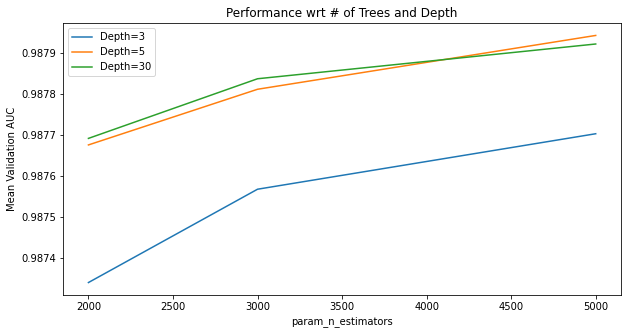

In [392]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
#lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==30),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
#lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=30', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

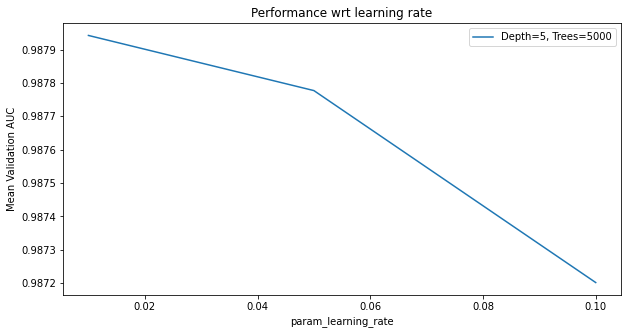

In [393]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==5000) & (df_cv_results['param_max_depth']==5),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=5, Trees=5000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [ ]:


model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.01,
                                          max_depth=5,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_for_training, y_train),(X_test_features, y_test)]

model_xgboost_fin.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

In [ ]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_train_pred = model_xgboost_fin.predict_proba(X_for_training)
y_valid_pred = model_xgboost_fin.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

In [ ]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
y_pred = model_xgboost_fin.predict(X_test_features)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictions)
prediction_0 = le.inverse_transform(predictions)
print(prediction_0)
print(test_labels)

In [8]:
from sklearn.metrics import confusion_matrix
cm_grid = confusion_matrix(test_labels, prediction_0)
ax=sns.heatmap(cm_grid, annot=True)
ax.set_title('Seaborn Confusion Matrix with labels_MF_100\n\n');
ax.set_xlabel('\nPredicted Breast cancer  Category')
ax.set_ylabel('Actual Breast cancer Category ')
ax.xaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])
ax.yaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])


In [97]:
Tp_0=cm_grid[0,0]
Tp_1=cm_grid[1,1]
Tp_2=cm_grid[2,2]
Tp_3=cm_grid[3,3]
Tp_4=cm_grid[4,4]
Tp_5=cm_grid[5,5]
Tp_6=cm_grid[6,6]
Tp_7=cm_grid[7,7]

FN_0=cm_grid[0,1]+cm_grid[0,2]+cm_grid[0,3]+cm_grid[0,4]+cm_grid[0,5]+cm_grid[0,6]+cm_grid[0,7]
FN_1=cm_grid[1,0]+cm_grid[1,2]+cm_grid[1,3]+cm_grid[1,4]+cm_grid[1,5]+cm_grid[1,6]+cm_grid[1,7]
FN_2=cm_grid[2,0]+cm_grid[2,1]+cm_grid[2,3]+cm_grid[2,4]+cm_grid[2,5]+cm_grid[2,6]+cm_grid[2,7]
FN_3=cm_grid[3,0]+cm_grid[3,1]+cm_grid[3,2]+cm_grid[3,4]+cm_grid[3,5]+cm_grid[3,6]+cm_grid[3,7]
FN_4=cm_grid[4,0]+cm_grid[4,1]+cm_grid[4,2]+cm_grid[4,3]+cm_grid[4,5]+cm_grid[4,6]+cm_grid[4,7]
FN_5=cm_grid[5,0]+cm_grid[5,1]+cm_grid[5,2]+cm_grid[5,3]+cm_grid[5,4]+cm_grid[5,6]+cm_grid[5,7]
FN_6=cm_grid[6,0]+cm_grid[6,1]+cm_grid[6,2]+cm_grid[6,3]+cm_grid[6,4]+cm_grid[6,5]+cm_grid[6,7]
FN_7=cm_grid[7,0]+cm_grid[7,1]+cm_grid[7,2]+cm_grid[7,3]+cm_grid[7,4]+cm_grid[7,5]+cm_grid[7,6]



Fp_0=cm_grid[1,0]+cm_grid[2,0]+cm_grid[3,0]+cm_grid[4,0]+cm_grid[5,0]+cm_grid[6,0]+cm_grid[7,0]
Fp_1=cm_grid[0,1]+cm_grid[2,1]+cm_grid[3,1]+cm_grid[4,1]+cm_grid[5,1]+cm_grid[6,1]+cm_grid[7,1]
Fp_2=cm_grid[0,2]+cm_grid[1,2]+cm_grid[3,2]+cm_grid[4,2]+cm_grid[5,2]+cm_grid[6,2]+cm_grid[7,2]
Fp_3=cm_grid[0,3]+cm_grid[1,3]+cm_grid[2,3]+cm_grid[4,3]+cm_grid[5,3]+cm_grid[6,3]+cm_grid[7,3]
Fp_4=cm_grid[0,4]+cm_grid[1,4]+cm_grid[2,4]+cm_grid[3,4]+cm_grid[5,4]+cm_grid[6,4]+cm_grid[7,4]
Fp_5=cm_grid[0,5]+cm_grid[1,5]+cm_grid[2,5]+cm_grid[3,5]+cm_grid[4,5]+cm_grid[6,5]+cm_grid[7,5]
Fp_6=cm_grid[0,6]+cm_grid[1,6]+cm_grid[2,6]+cm_grid[3,6]+cm_grid[4,6]+cm_grid[5,6]+cm_grid[7,6]
Fp_7=cm_grid[0,7]+cm_grid[1,7]+cm_grid[2,7]+cm_grid[3,7]+cm_grid[4,7]+cm_grid[5,7]+cm_grid[6,7]

l=[]
for i in range(len(cm_grid)):
    for j in range(len(cm_grid)):
        l.append(cm_grid[i,j])
        
    
Tn_0=sum(l)-Tp_0-FN_0-Fp_0
Tn_1=sum(l)-Tp_1-FN_1-Fp_1
Tn_2=sum(l)-Tp_2-FN_2-Fp_2
Tn_3=sum(l)-Tp_3-FN_3-Fp_3
Tn_4=sum(l)-Tp_4-FN_4-Fp_4
Tn_5=sum(l)-Tp_5-FN_5-Fp_5
Tn_6=sum(l)-Tp_6-FN_6-Fp_6
Tn_7=sum(l)-Tp_7-FN_7-Fp_7

TP=[Tp_0,Tp_1,Tp_2,Tp_3,Tp_4,Tp_5,Tp_6,Tp_7]
FN=[FN_0,FN_1,FN_2,FN_3,FN_4,FN_5,FN_6,FN_7]
FP=[Fp_0,Fp_1,Fp_2,Fp_3,Fp_4,Fp_5,Fp_6,Fp_7]
TN=[Tn_0,Tn_1,Tn_1,Tn_2,Tn_3,Tn_4,Tn_6,Tn_7]

df=pd.DataFrame(index=np.arange(0,8),columns=['TP','FN','FP','TN'])
df['TP']=TP
df['FN']=FN
df['FP']=FP
df['TN']=TN
print(df)



df.rename(index={0:'A',1:'DC',2:'FB',3:'LC',4:'MC',5:'PC',6:'PT',7:'TA'},inplace=True)

df


   TP  FN  FP   TN
0  34   6  11  271
1  32   8   8  274
2  32   8   7  274
3  30  10  21  275
4  28  12   4  261
5  37   4  10  278
6  26  14   4  278
7  29  12   9  272


,TP,FN,FP,TN
A,34,6,11,271
DC,32,8,8,274
FB,32,8,7,274
LC,30,10,21,275
MC,28,12,4,261
PC,37,4,10,278
PT,26,14,4,278
TA,29,12,9,272


In [98]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
sublabel=['A','DC','FB','LC','MC','PC','PT','TA']
ds=['TP','FN','FP','TN']
colors = ["#c9d9d3", "#718dbf", "#e84d60",'#ffa180']

data = {'sublabel' : sublabel,
        'TP'   : [34,32,32,30,28,37,26,29],
        'FN'   : [6,8,8,10,12,4,14,12],
        'FP'   : [11,8,7,21,4,10,4,9],
        'TN'  :[271,274,274,275,261,278,278,272]  
       }
p = figure(x_range=sublabel, height=250, title="Number of TP,FN,FP,TN with Magnification factors 100X",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(ds, x='sublabel', width=0.9, color=colors, source=data,
             legend_label=ds)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [3]:
from sklearn.metrics import classification_report
target_names =['Adenosis', 'ductal_carcinoma','fibroadenoma','lobular_carcinoma','mucinous-carcinoma','papillary-carcinoma','phyllodes_tumor','tubular-adenoma']
print(classification_report(y_test, predictions,target_names=target_names))

In [100]:
# importing pandas as pd
import pandas as pd
  
# import the StrinIO function
# from io module
from io import StringIO
  
# wrap the string data in StringIO function
StringData = StringIO("""subclass;precision;recall;f1-score
                            AD;0.65;0.78;0.70 
                            DC;0.78;0.70;0.74
                            FB;0.80;0.80;0.80
                            LC;0.60;0.78;0.67
                            MC;0.71;0.62;0.67
                            PC;0.68;0.85;0.76
                            PT;0.85;0.72;0.78 
                            TA ; 0.92;0.57;0.71""")
  
# let's read the data using the Pandas
# read_csv() function
df = pd.read_csv(StringData, sep =";")
  
# Print the dataframe

print(df)

df=df.set_index('subclass')
print(df)

                          subclass  precision  recall  f1-score
0                               AD       0.65    0.78      0.70
1                               DC       0.78    0.70      0.74
2                               FB       0.80    0.80      0.80
3                               LC       0.60    0.78      0.67
4                               MC       0.71    0.62      0.67
5                               PC       0.68    0.85      0.76
6                               PT       0.85    0.72      0.78
7                              TA        0.92    0.57      0.71
                                 precision  recall  f1-score
subclass                                                    
                            AD        0.65    0.78      0.70
                            DC        0.78    0.70      0.74
                            FB        0.80    0.80      0.80
                            LC        0.60    0.78      0.67
                            MC        0.71    0.62      0.

In [7]:
df.sort_values('f1-score',inplace=True)

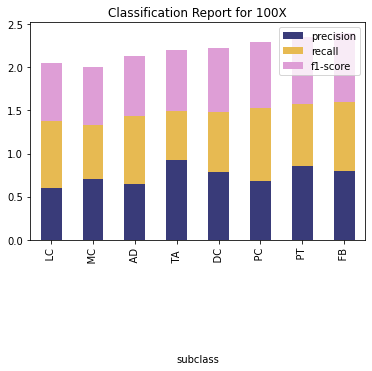

In [8]:
df.plot.bar(stacked=True,colormap='tab20b',title='Classification Report for 100X');